## Ironkaggle

## 1.Importo Librerías

In [1]:
# 📚 Basic Libraries
import pandas as pd
import numpy as np

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


## 2.Abrir el archivo

In [2]:
df = pd.read_csv('king_ country_ houses_aa.csv')

## 3.Lectura del archivo

In [3]:
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5584,8656300380,20140506T000000,272000.0,3,2.50,1650,13816,2.0,0,0,...,7,1650,0,1998,0,98014,47.6553,-121.912,1650,15144
815,1421069208,20141223T000000,379000.0,3,3.25,2660,17852,2.5,0,0,...,8,2660,0,2014,0,98010,47.3077,-122.011,1320,11876
19469,1562200090,20141017T000000,600000.0,4,2.50,2090,7290,1.0,0,0,...,8,1420,670,1966,0,98007,47.6240,-122.142,2110,8436
12262,1926059094,20140812T000000,330000.0,3,1.75,1340,10276,1.0,0,0,...,7,1340,0,1961,0,98034,47.7207,-122.222,2950,7987
3343,7132300042,20141028T000000,247300.0,2,2.00,1140,1118,2.0,0,0,...,7,1040,100,2009,0,98144,47.5960,-122.311,1140,1118


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
df.shape

(21613, 21)

In [7]:
casas= df.copy()

In [8]:
casas['bathrooms'] = casas['bathrooms'].astype(int)

In [9]:
casas['renovated'] = casas['yr_renovated'].apply(lambda x: 1 if x != 0 else 0)

## 4.Explicación del archivo

The dataset cantains 21 house features plus the price, along with 21613 observations.

The description for the 21 features is given below:

- id :- It is the unique numeric number assigned to each house being sold.

- date :- It is the date on which the house was sold out.

- price:- It is the price of house which we have to predict so this is our target variable and aprat from it are our features.

- bedrooms :- It determines number of bedrooms in a house.

- bathrooms :- It determines number of bathrooms in a bedroom of a house.

- sqft_living :- It is the measurement variable which determines the measurement of house in square foot.

- sqft_lot : It is also the measurement variable which determines square foot of the lot.

- floors: It determines total floors means levels of house.

- waterfront : This feature determines whether a house has a view to waterfront 0 means no 1 means yes.

- view : This feature determines whether a house has been viewed or not 0 means no 1 means yes.

- condition : It determines the overall condition of a house on a scale of 1 to 5.

- grade : It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11

- sqft_above : It determines square footage of house apart from basement.

- sqft_basement : It determines square footage of the basement of the house.

- yr_built : It detrmines the date of building of the house.

- yr_renovated : It detrmines year of renovation of house.

- zipcode : It determines the zipcode of the location of the house.

- lat : It determines the latitude of the location of the house.

- long : It determines the longitude of the location of the house.

- sqft_living15 : Living room area in 2015(implies-- some renovations)

- sqft_lot15 : lotSize area in 2015(implies-- some renovations)
- TARGET --> Price: Our primary focus is to understand which features most significantly impact the house price. Additionally, we aim to explore properties valued at $650K and above for more detailed insights.

Precio: Nuestro enfoque principal es entender qué características impactan de manera más significativa en el precio de la vivienda. Además, buscamos explorar propiedades valoradas en $650,000 o más para obtener perspectivas más detalladas.

## 5.Limpieza de datos

<h2 style="color: #008080;">Checking Null Values</h2>

In [10]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<h2 style="color: #008080;">Checking Duplicates</h2>

In [11]:
df.duplicated().sum()

0

<h2 style="color: #008080;">Checking Emtpy Spaces</h2>

In [12]:
df.eq(" ").sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
casas.nunique().sort_values(ascending=False)

id               21436
sqft_lot          9782
sqft_lot15        8689
lat               5034
price             4028
sqft_living       1038
sqft_above         946
sqft_living15      777
long               752
date               372
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
bedrooms            13
grade               12
bathrooms            9
floors               6
condition            5
view                 5
waterfront           2
renovated            2
dtype: int64

## 6.Estadisticas principales

In [14]:
casas.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1000102.00,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,75000.00,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370000e+00,9.300000e-01,0.00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,1.750000e+00,7.300000e-01,0.00,1.000000e+00,2.000000e+00,2.000000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184400e+02,290.00,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,520.00,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.490000e+00,5.400000e-01,1.00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,1.000000e-02,9.000000e-02,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.300000e-01,7.700000e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.410000e+00,6.500000e-01,1.00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


## 6.1-Histograma de los datos y de nuestro target

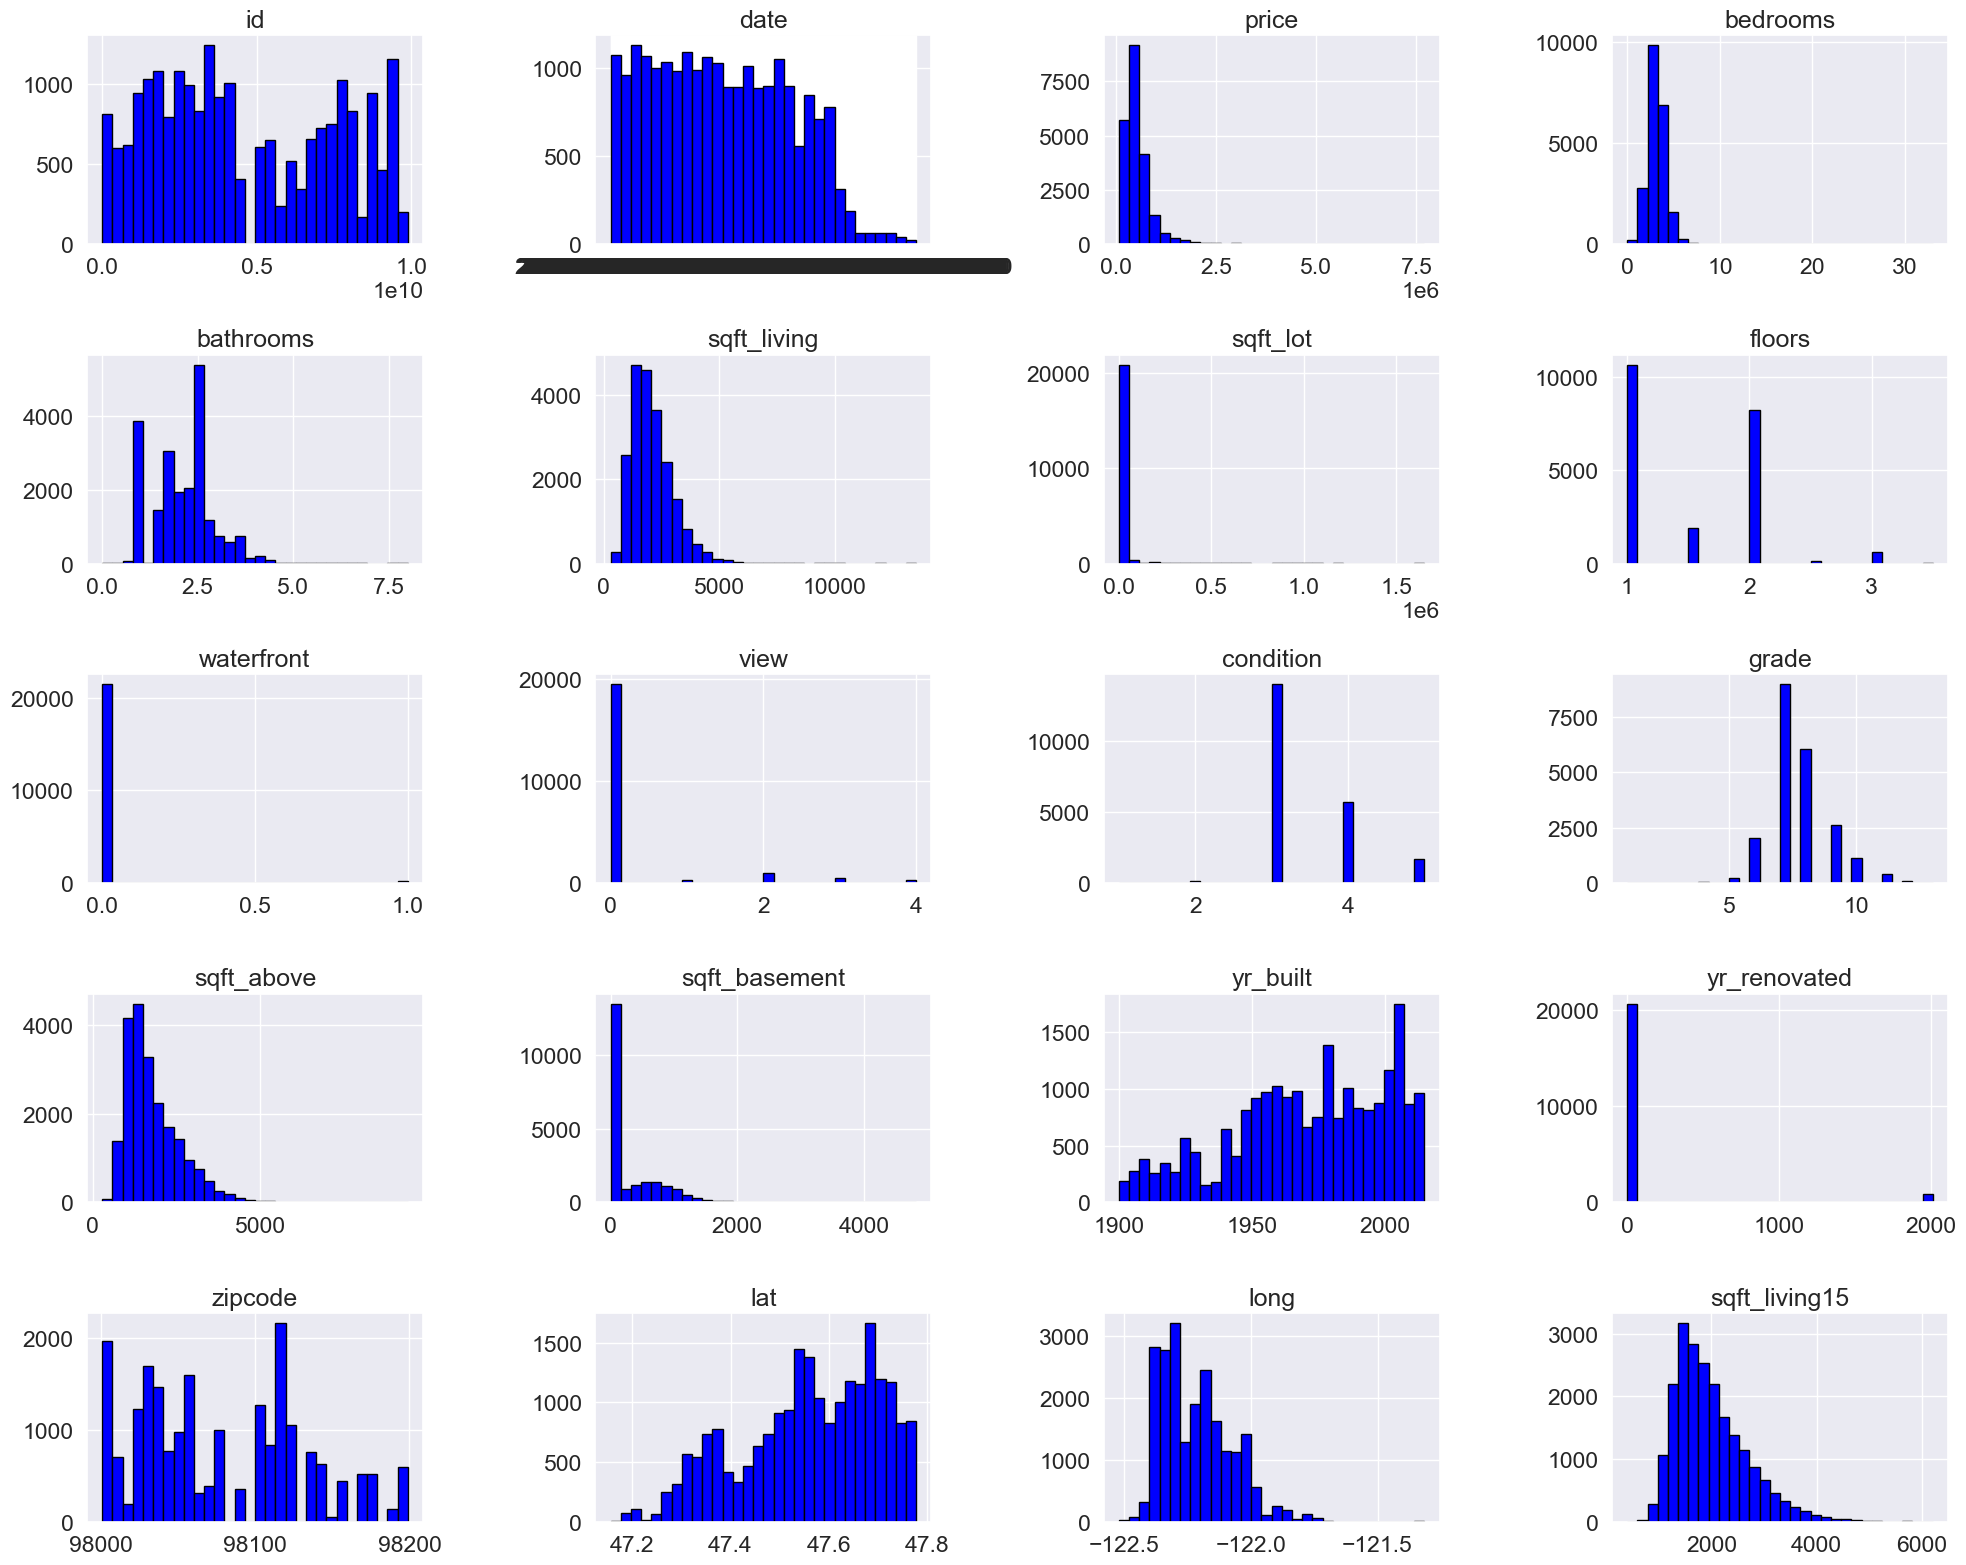

In [156]:
color = '#0000FF'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(casas.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

Checking our target

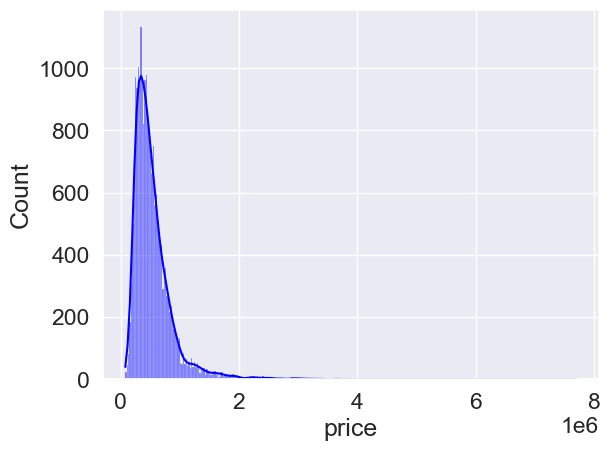

In [157]:
sns.histplot(df["price"], color=color, kde=True);

## 6.2 Outliers de los datos

Correlaciones

In [17]:
casas['date'] = casas['date'].astype(str).str.split('T', expand=True)[0]

In [18]:
casas['date'] = pd.to_datetime(casas['date']).apply(lambda x: x.toordinal())


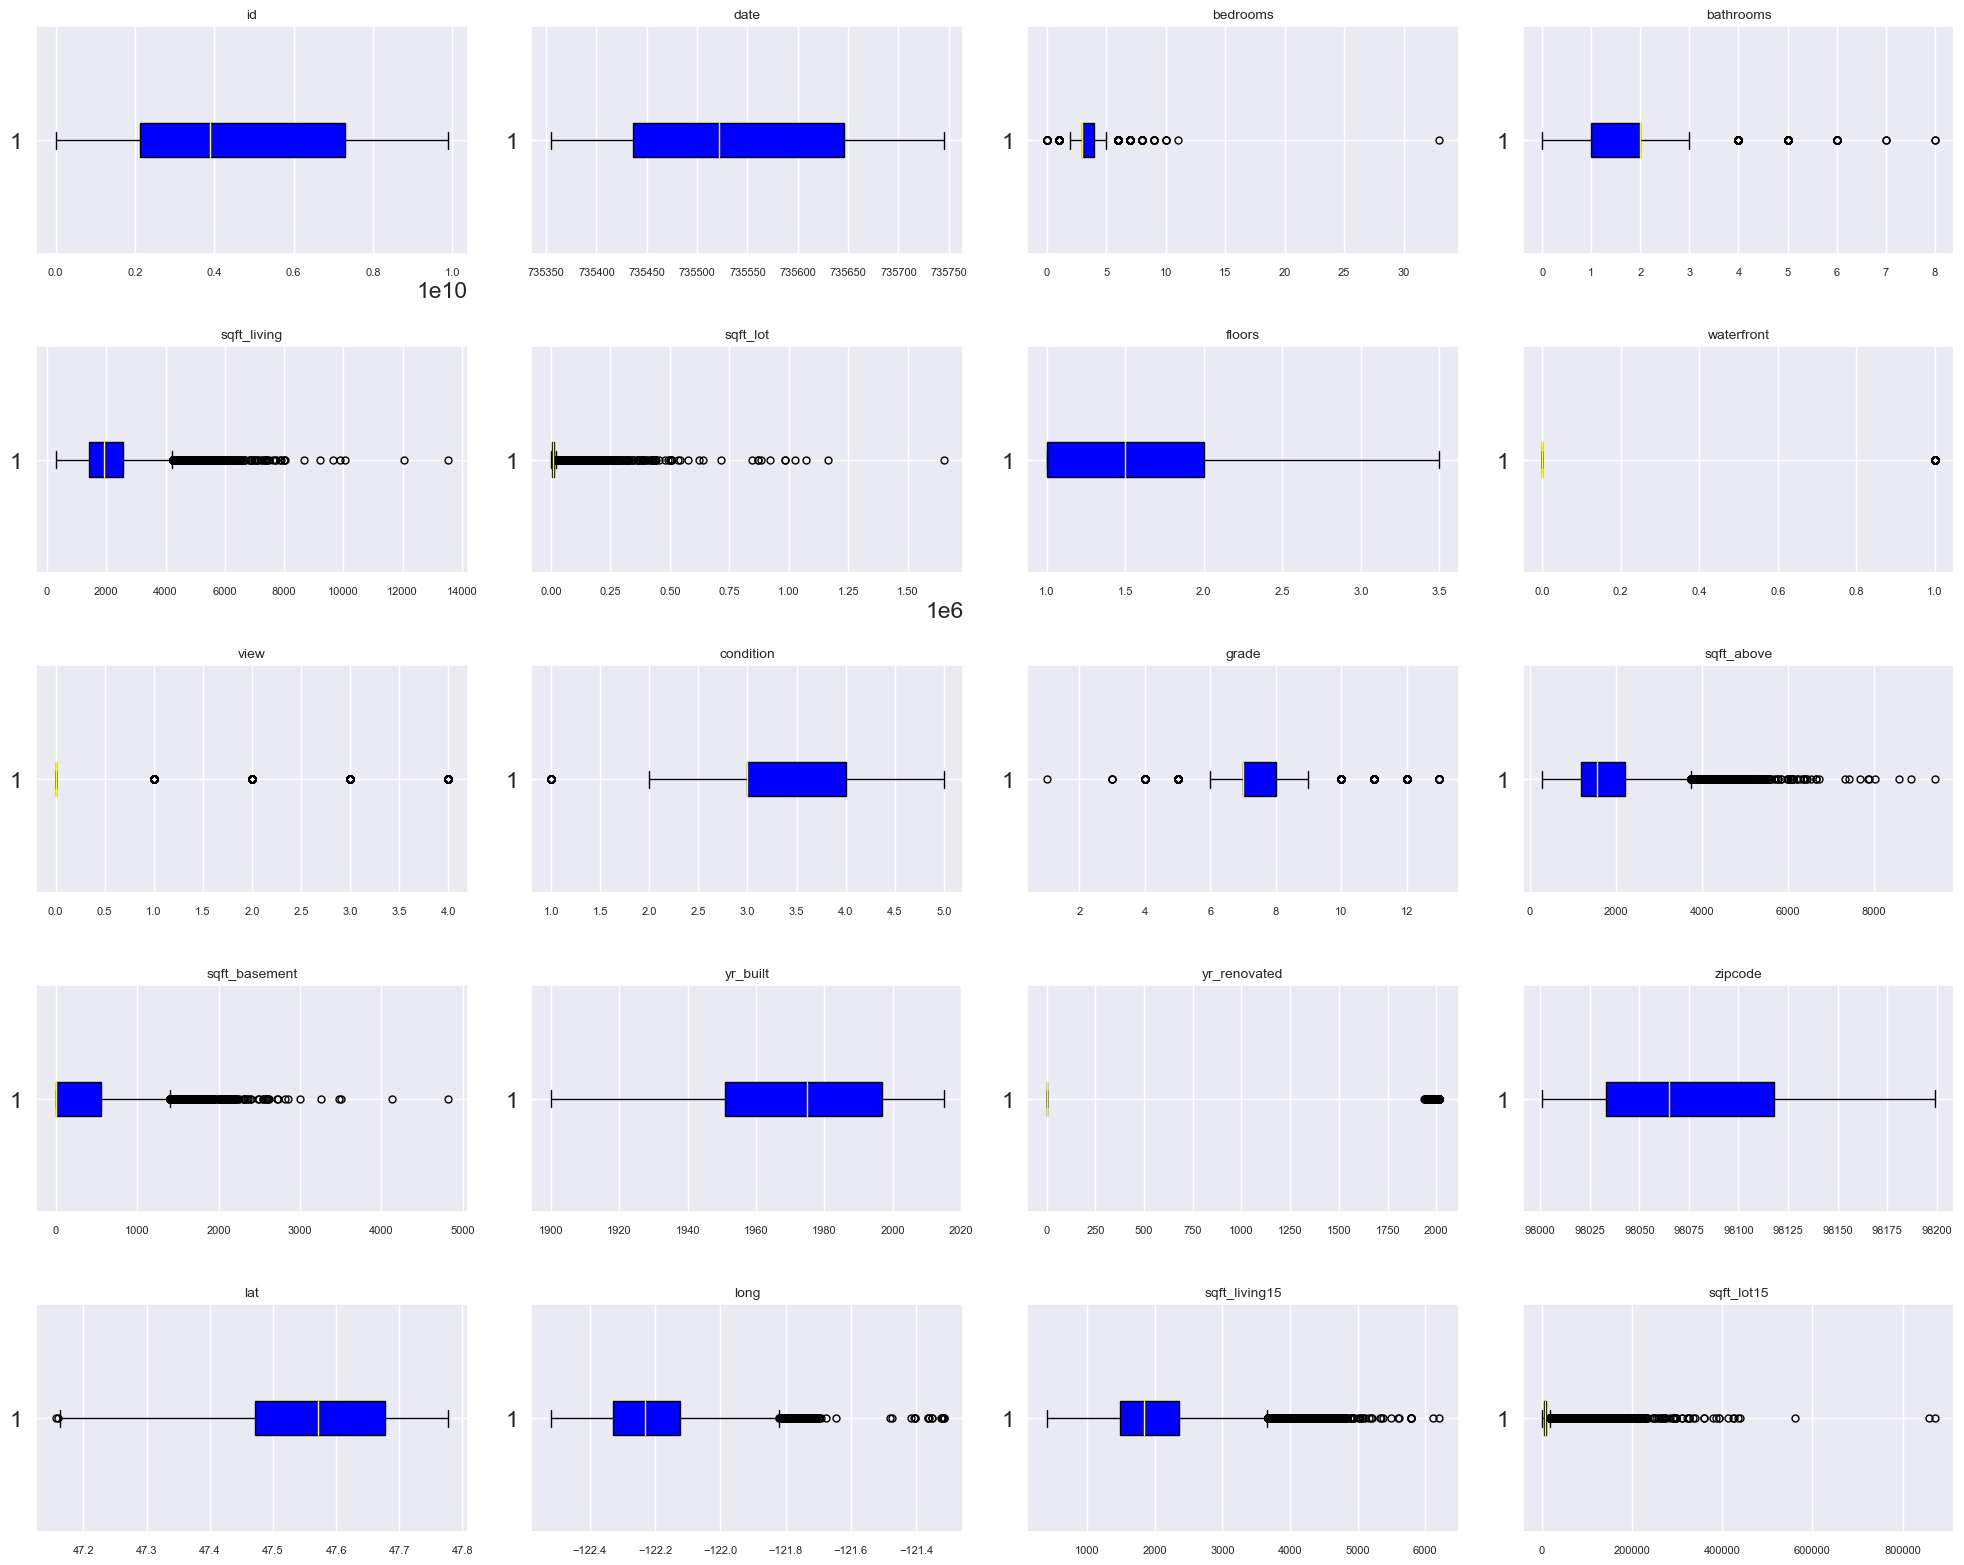

In [158]:
color =  '#0000FF'
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(casas.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(casas.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(casas.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

## 6.3- Correlaciones y heatmap

In [20]:
casas.corrwith(casas["price"]).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.510072
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
renovated        0.126092
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
date            -0.004357
id              -0.016762
zipcode         -0.053203
dtype: float64

In [21]:
df_without_price = casas.drop(['price'], axis=1)

casas= pd.concat([df_without_price, casas['price']], axis=1)

In [22]:
num_corr = round(casas.corr(), 2)

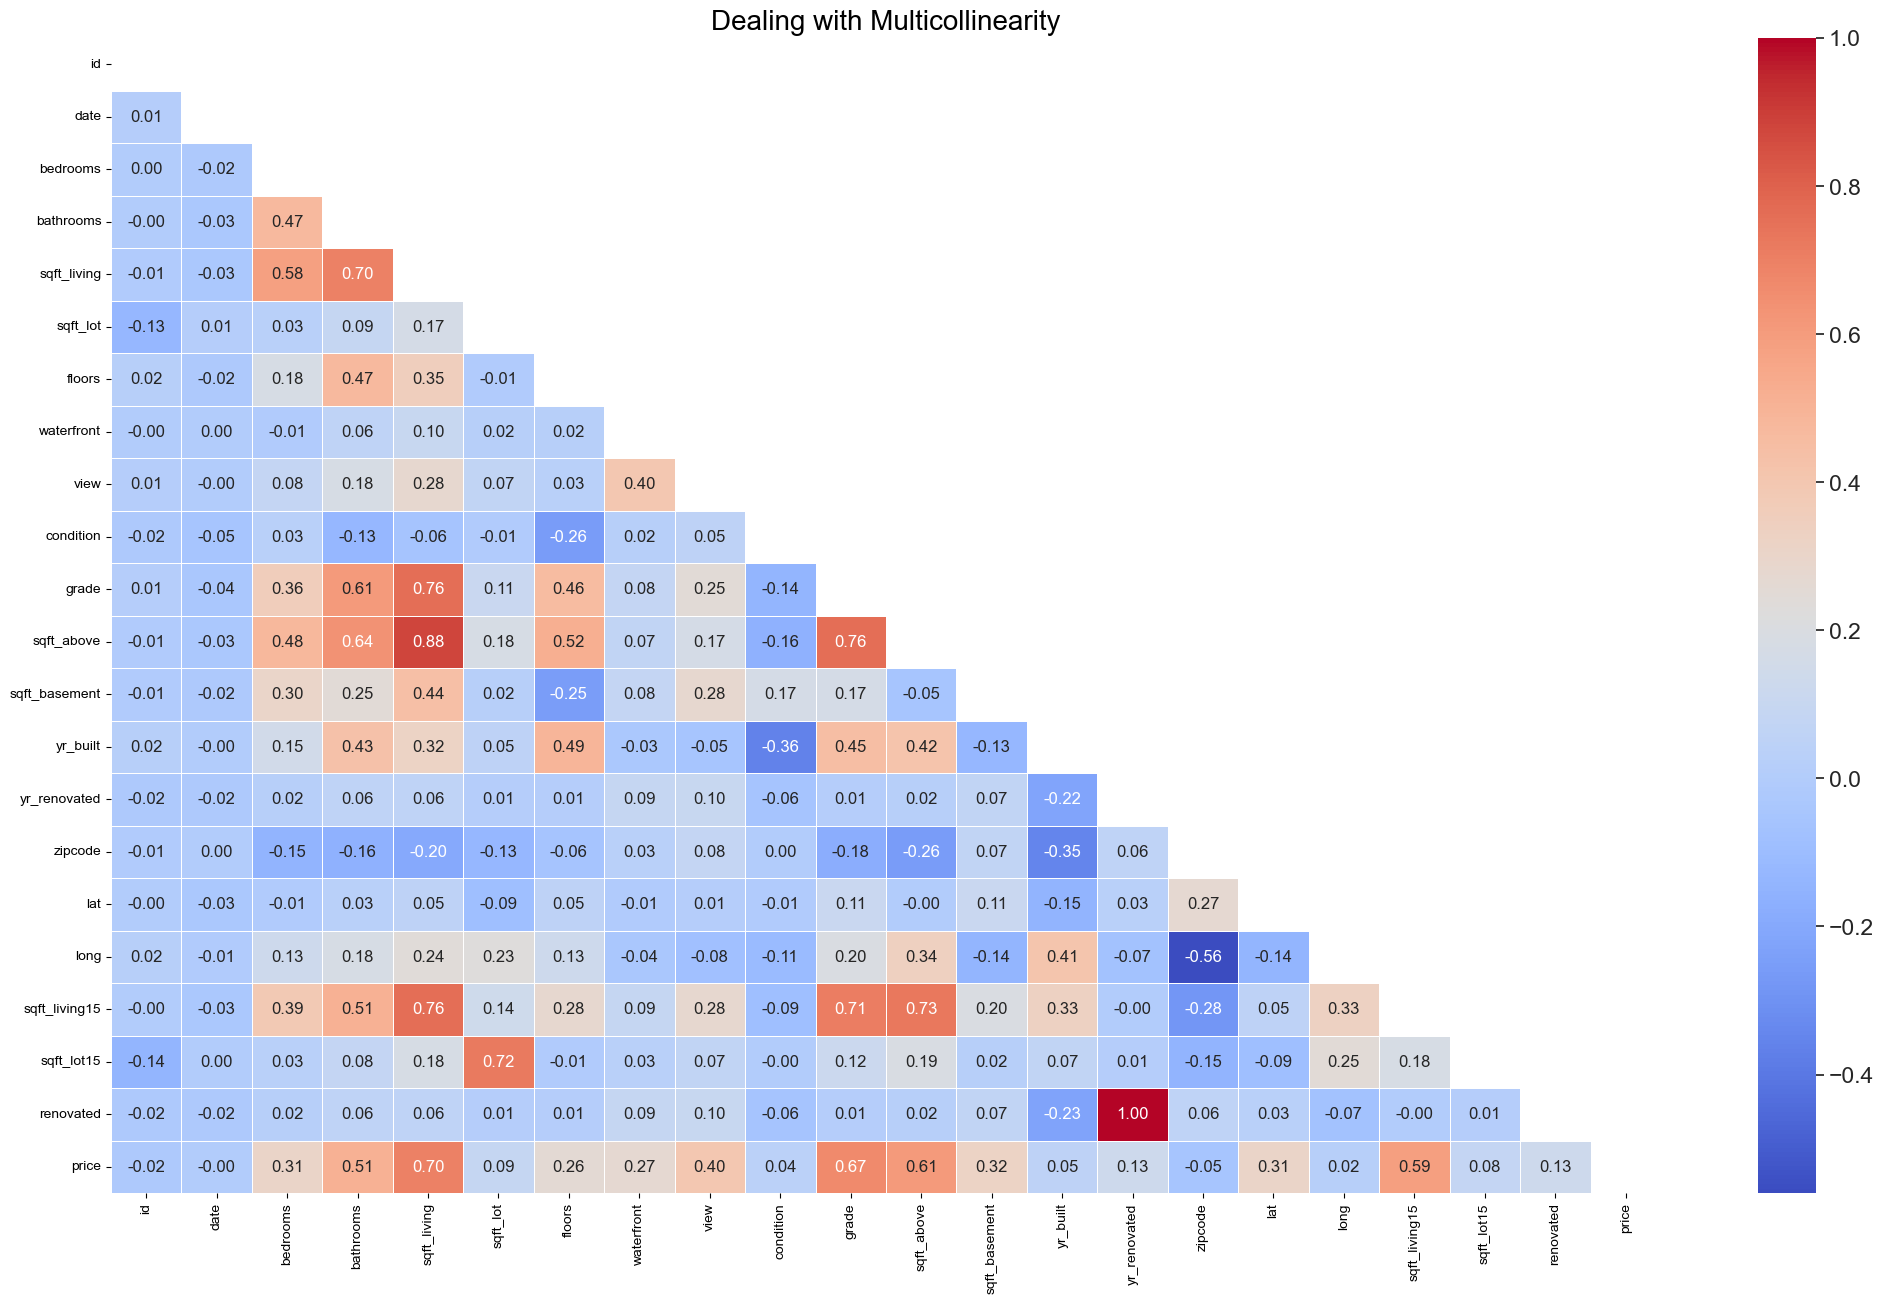

In [23]:
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

## Primeras conclusiones

- sqft_living (Superficie habitable): La correlación positiva de 0.702 sugiere que hay una fuerte relación positiva entre la superficie habitable y el precio de la vivienda. A medida que la superficie habitable aumenta, es probable que el precio también lo haga.

- grade (Grado de construcción): Con una correlación de 0.667, el grado de construcción también muestra una fuerte relación positiva. Un grado de construcción más alto está asociado con precios de vivienda más altos.

- sqft_above (Superficie habitable sobre el nivel del suelo): Con una correlación de 0.606, la superficie habitable sobre el nivel del suelo también está positivamente relacionada con el precio.

- sqft_living15: La correlación de 0.585 indica que la superficie habitable promedio de los vecinos cercanos también influye en el precio (antes de 2015 pudo haber renovaciones).

- bathrooms (Número de baños): Con una correlación de 0.510, el número de baños tiene una influencia positiva en el precio.

## 7.Filtrado > 650.000$

Price superior a 650.000

In [24]:
casas_filtered = casas[casas['price'] > 650000]

In [25]:
casas_filtered.shape

(5207, 22)

In [26]:
casas_filtered.corrwith(casas_filtered["price"]).sort_values(ascending=False)

price            1.000000
sqft_living      0.605983
grade            0.504028
sqft_above       0.463309
bathrooms        0.460575
sqft_living15    0.369248
view             0.339016
waterfront       0.312465
sqft_basement    0.290139
bedrooms         0.201238
floors           0.122882
renovated        0.104400
yr_renovated     0.104321
sqft_lot15       0.037177
sqft_lot         0.031000
yr_built         0.028948
date             0.008140
condition        0.004160
lat             -0.008221
id              -0.051172
zipcode         -0.083695
long            -0.085488
dtype: float64

In [27]:
num_corr = round(casas_filtered.corr(), 2)

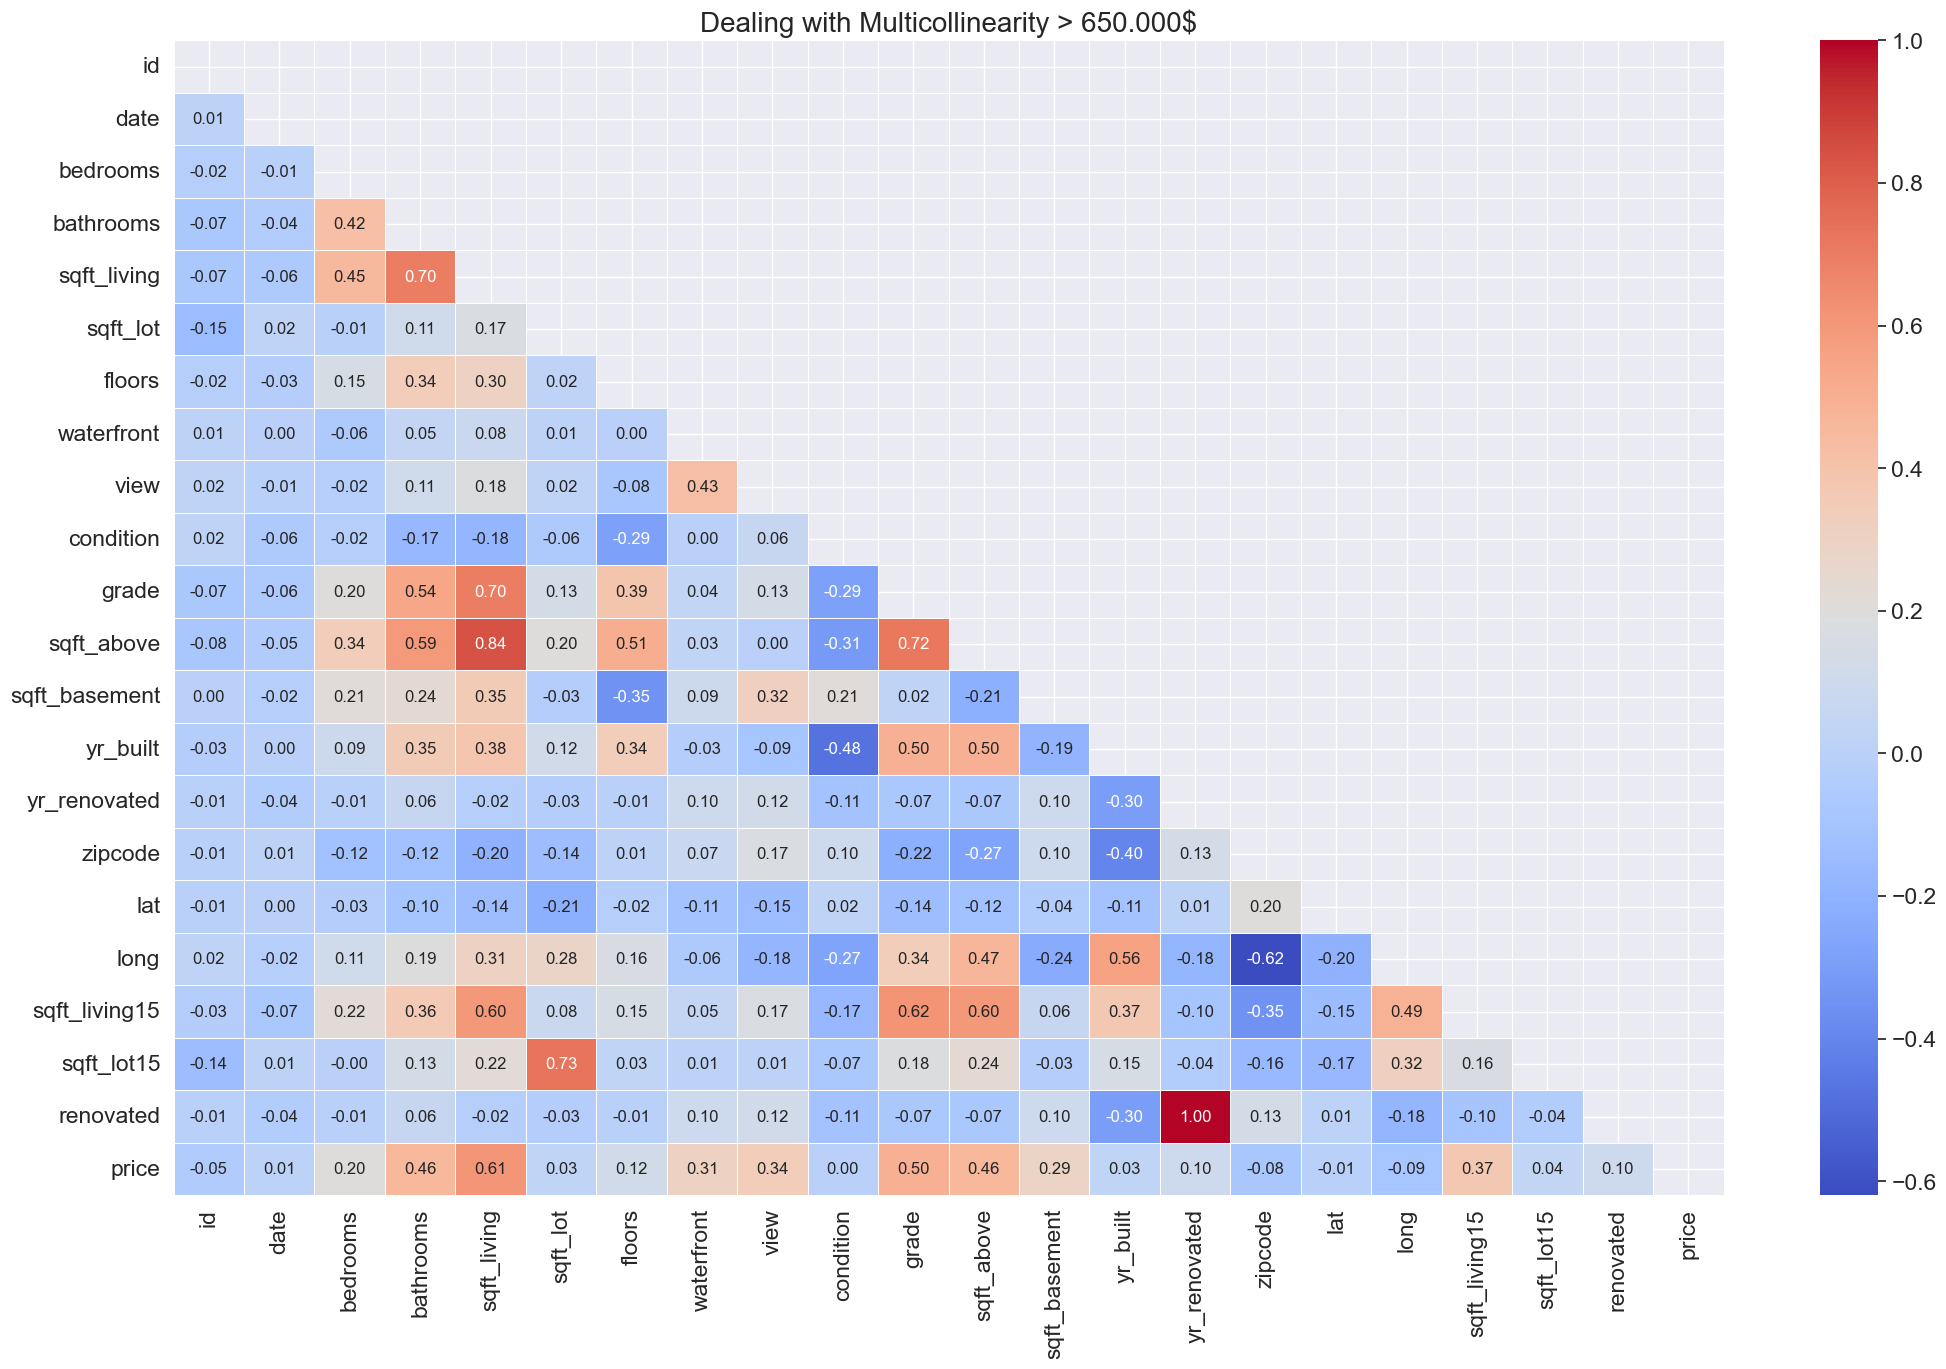

In [28]:
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity > 650.000$", fontsize=20) # add title
plt.show()

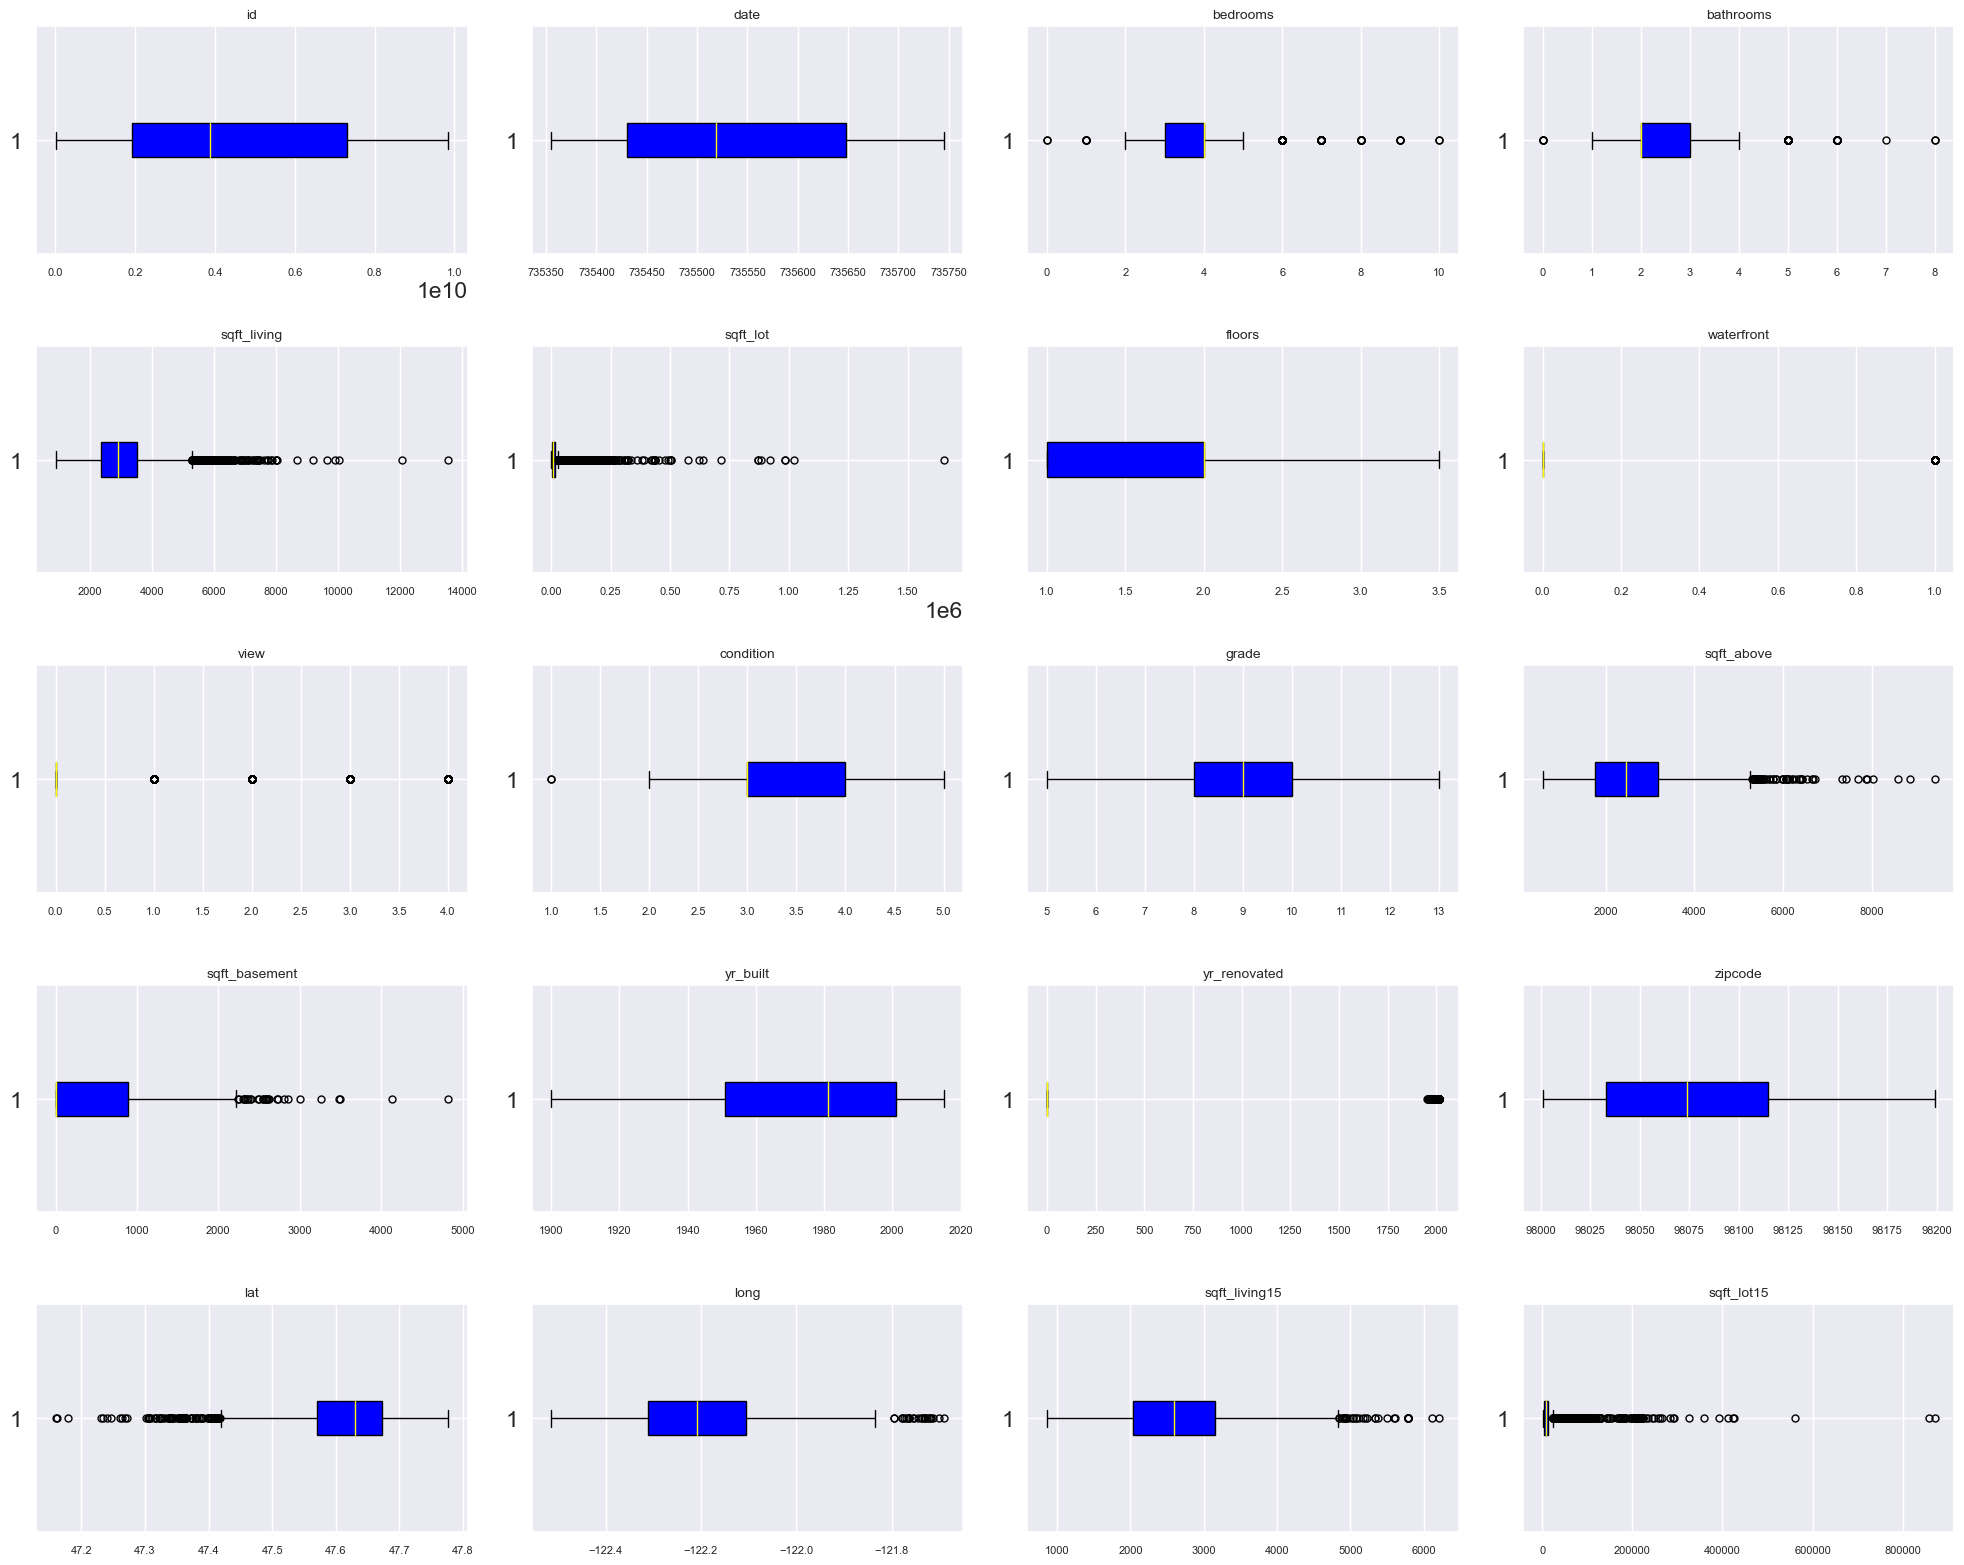

In [159]:
color = '#0000FF'
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(casas_filtered.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(casas_filtered.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(casas_filtered.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

## Segundas conclusiones


- sqft_living (Superficie habitable): La correlación de 0.606 sugiere una relación positiva sólida entre la superficie habitable y el precio. A medida que la superficie habitable aumenta, el precio también tiende a aumentar.

- grade (Grado de construcción): Con una correlación de 0.504, el grado de construcción sigue siendo significativamente positivo. Un grado más alto está asociado con precios más altos.

- sqft_above (Superficie habitable sobre el nivel del suelo): Con una correlación de 0.463, la superficie habitable sobre el nivel del suelo también está positivamente relacionada con el precio.

- bathrooms (Número de baños): La correlación de 0.461 indica que el número de baños sigue siendo un factor relevante en el precio.

- sqft_living15 (Superficie habitable promedio de los 15 vecinos más cercanos): Aunque la correlación ha disminuido a 0.369, sigue siendo positiva, lo que sugiere que la superficie habitable promedio de los vecinos cercanos en 2015 aún tiene alguna influencia en el precio.

- view (Vistas): La correlación de 0.339 sugiere una relación positiva, indicando que propiedades con mejores vistas tienden a tener precios más altos.

- waterfront (Frente al agua): Con una correlación de 0.312, estar en una propiedad frente al agua está positivamente relacionado con el precio.

- sqft_basement (Superficie habitable del sótano): La correlación de 0.290 indica que la superficie habitable del sótano también está positivamente relacionada con el precio.

In [30]:
correlation_all = casas.corrwith(casas["price"]).sort_values(ascending=False)
correlation_filtered = casas_filtered.corrwith(casas_filtered["price"]).sort_values(ascending=False)


df_correlation_casas = pd.DataFrame(correlation_all, columns=['correlation_all'])
df_correlation_filtered = pd.DataFrame(correlation_filtered, columns=['correlation_filtered'])

correlation_comparison = pd.concat([df_correlation_casas, df_correlation_filtered], axis=1)

correlation_comparison['difference'] = correlation_comparison['correlation_filtered'] - correlation_comparison['correlation_all']

correlation_comparison


,correlation_all,correlation_filtered,difference
price,1.000000,1.000000,0.000000
sqft_living,0.702035,0.605983,-0.096052
grade,0.667434,0.504028,-0.163406
sqft_above,0.605567,0.463309,-0.142258
sqft_living15,0.585379,0.369248,-0.216131
bathrooms,0.510072,0.460575,-0.049497
view,0.397293,0.339016,-0.058277
sqft_basement,0.323816,0.290139,-0.033677
bedrooms,0.308350,0.201238,-0.107112
lat,0.307003,-0.008221,-0.315225


Comparando ambas listas, podemos observar que las correlaciones son en general consistentes. Las características como la superficie habitable (sqft_living), el grado (grade), la superficie habitable sobre el nivel del suelo (sqft_above) y el número de baños (bathrooms) siguen siendo factores importantes tanto en el conjunto completo de casas como en aquellas con precios superiores a 650,000.

## 8.Modelos de maching learning

Lo hacemos con el modelo sin filtrar y sin quitar los outliers

In [31]:
casas.shape

(21613, 22)

## 8.1 Lineal Regression (Primero sin filtros, despues con filtro >650.000$) y con outliers

In [32]:
X = casas.drop("price", axis=1)
y = casas["price"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
print(f'100% of our data: {len(df)}.')
print(f'80% for training data: {len(X_train)}.')
print(f'20% for test data: {len(X_test)}.')

100% of our data: 21613.
80% for training data: 17290.
20% for test data: 4323.


In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
predictions = model.predict(X_test)

In [37]:
print(f'20% for test prediction data: {len(predictions)}.')

20% for test prediction data: 4323.


In [38]:
r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

In [39]:
#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("The value of the metric MSE is ", round(MSE_3, 4))
print("MAE = ", round(MAE_3, 4))

R2 =  0.7049
RMSE =  211219.1154
The value of the metric MSE is  44613514729.2849
MAE =  126917.3761


Lo repetimos con el modelo de >650.000$

In [40]:
casas_filtered.shape

(5207, 22)

In [41]:
X1 = casas_filtered.drop("price", axis=1)
y1 = casas_filtered["price"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [43]:
print(f'100% of our data: {len(casas_filtered)}.')
print(f'80% for training data: {len(X_train)}.')
print(f'20% for test data: {len(X_test)}.')

100% of our data: 5207.
80% for training data: 4165.
20% for test data: 1042.


In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
predictions = model.predict(X_test)

In [46]:
print(f'20% for test prediction data: {len(predictions)}.')

20% for test prediction data: 1042.


In [47]:
r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

In [48]:
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("The value of the metric MSE is ", round(MSE_3, 4))
print("MAE = ", round(MAE_3, 4))

R2 =  0.6366
RMSE =  282865.5992
The value of the metric MSE is  80012947202.2362
MAE =  195367.6398


In [49]:
casas_filtered.shape

(5207, 22)

In [50]:
casas.shape

(21613, 22)

## 8.2 Modelo Ridge regression > 650.000&

In [51]:
from sklearn.linear_model import Ridge

In [52]:
X1 = casas_filtered.drop("price", axis=1)
y1 = casas_filtered["price"]

In [53]:
ridge = Ridge()
ridge.fit(X_train, y_train)

C:\Users\Carlos\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.76892e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()

In [54]:
predictions_ridge = ridge.predict(X_test)

In [55]:
r2_3_2 = r2_score(y_test, predictions_ridge)
RMSE_3_2 = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_3_2 = mean_squared_error(y_test, predictions_ridge)
MAE_3_2 = mean_absolute_error(y_test, predictions_ridge)

In [56]:
#Printing the results
print("R2 = ", round(r2_3_2, 4))
print("RMSE = ", round(RMSE_3_2, 4))
print("The value of the metric MSE is ", round(MSE_3_2, 4))
print("MAE = ", round(MAE_3_2, 4))

R2 =  0.6368
RMSE =  282781.2343
The value of the metric MSE is  79965226459.3401
MAE =  194940.7078


## 8.3 Modelo lasso regression >650.000

In [57]:
from sklearn.linear_model import Lasso

In [58]:
X1 = casas_filtered.drop("price", axis=1)
y1 = casas_filtered["price"]

In [59]:
lasso = Lasso()
lasso.fit(X_train, y_train)

C:\Users\Carlos\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.874e+14, tolerance: 9.716e+10
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [60]:
predictions_lasso = lasso.predict(X_test)

In [61]:
r2_3_3 = r2_score(y_test, predictions_lasso)
RMSE_3_3 = mean_squared_error(y_test, predictions_lasso, squared=False)
MSE_3_3 = mean_squared_error(y_test, predictions_lasso)
MAE_3_3 = mean_absolute_error(y_test, predictions_lasso)

In [62]:
#Printing the results
print("R2 = ", round(r2_3_3, 4))
print("RMSE = ", round(RMSE_3_3, 4))
print("The value of the metric MSE is ", round(MSE_3_3, 4))
print("MAE = ", round(MAE_3_3, 4))

R2 =  0.6367
RMSE =  282834.5487
The value of the metric MSE is  79995381933.066
MAE =  195358.7692


## 8.4 Modelo Tree Regression >650.000

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
X1 = casas_filtered.drop("price", axis=1)
y1 = casas_filtered["price"]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [66]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [67]:
predictions_tree = tree.predict(X_test)

In [68]:
r2_3_4 = r2_score(y_test, predictions_tree)
RMSE_3_4 = mean_squared_error(y_test, predictions_tree, squared=False)
MSE_3_4 = mean_squared_error(y_test, predictions_tree)
MAE_3_4 = mean_absolute_error(y_test, predictions_tree)

In [69]:
#Printing the results
print("R2 = ", round(r2_3_4, 4))
print("RMSE = ", round(RMSE_3_4, 4))
print("The value of the metric MSE is ", round(MSE_3_4, 4))
print("MAE = ", round(MAE_3_4, 4))

R2 =  0.3854
RMSE =  367859.0443
The value of the metric MSE is  135320276440.2418
MAE =  184311.2015


##  8.5 Modelo Knn Regression >650.000

In [70]:
from sklearn.neighbors import KNeighborsRegressor

In [71]:
X1 = casas_filtered.drop("price", axis=1)
y1 = casas_filtered["price"]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [73]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [74]:
predictions_knn = knn.predict(X_test)

In [75]:
r2_3_5 = r2_score(y_test, predictions_knn)
RMSE_3_5 = mean_squared_error(y_test, predictions_knn, squared=False)
MSE_3_5 = mean_squared_error(y_test, predictions_knn)
MAE_3_5 = mean_absolute_error(y_test, predictions_knn)

In [76]:
#Printing the results
print("R2 = ", round(r2_3_5, 4))
print("RMSE = ", round(RMSE_3_5, 4))
print("The value of the metric MSE is ", round(MSE_3_5, 4))
print("MAE = ", round(MAE_3_5, 4))

R2 =  0.06
RMSE =  454932.3591
The value of the metric MSE is  206963451394.5174
MAE =  271829.4163


## 8.6 Modelo XGBoost >650.000

In [77]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [78]:
!pip install xgboost

In [79]:
import xgboost as xgb

In [80]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [81]:
predictions_xgb = xgbr.predict(X_test)

In [82]:
r2_3_6 = r2_score(y_test, predictions_xgb)
RMSE_3_6 = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_3_6 = mean_squared_error(y_test, predictions_xgb)
MAE_3_6 = mean_absolute_error(y_test, predictions_xgb)

In [83]:
#Printing the results
print("R2 = ", round(r2_3_6, 4))
print("RMSE = ", round(RMSE_3_6, 4))
print("The value of the metric MSE is ", round(MSE_3_6, 4))
print("MAE = ", round(MAE_3_6, 4))

R2 =  0.7413
RMSE =  238642.3553
The value of the metric MSE is  56950173766.827
MAE =  153146.4533


## Comparacion final

In [84]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost'],
    'R²': [round(r2_3, 2), round(r2_3_2, 2), round(r2_3_3, 2), round(r2_3_4, 2), round(r2_3_5, 2), round(r2_3_6, 2)],
    'RMSE': [round(RMSE_3, 2), round(RMSE_3_2, 2), round(RMSE_3_3, 2), round(RMSE_3_4, 2), round(RMSE_3_5, 2), round(RMSE_3_6, 2)],
    'MSE': [round(MSE_3, 2), round(MSE_3_2, 2), round(MSE_3_3, 2), round(MSE_3_4, 2), round(MSE_3_5, 2), round(MSE_3_6, 2)],
    'MAE': [round(MAE_3, 2), round(MAE_3_2, 2), round(MAE_3_3, 2), round(MAE_3_4, 2), round(MAE_3_5, 2), round(MAE_3_6, 2)]
}


In [85]:
df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model").T

Model,Linear Regression,Ridge,Lasso,Decision Tree,KNN,XGBoost
R²,6.400000e-01,6.400000e-01,6.400000e-01,3.900000e-01,6.000000e-02,7.400000e-01
RMSE,2.828656e+05,2.827812e+05,2.828345e+05,3.678590e+05,4.549324e+05,2.386424e+05
MSE,8.001295e+10,7.996523e+10,7.999538e+10,1.353203e+11,2.069635e+11,5.695017e+10
MAE,1.953676e+05,1.949407e+05,1.953588e+05,1.843112e+05,2.718294e+05,1.531465e+05


## 9 Mejoras del model normalización

##  9. 1 Normalizamos con MinMaxScaler

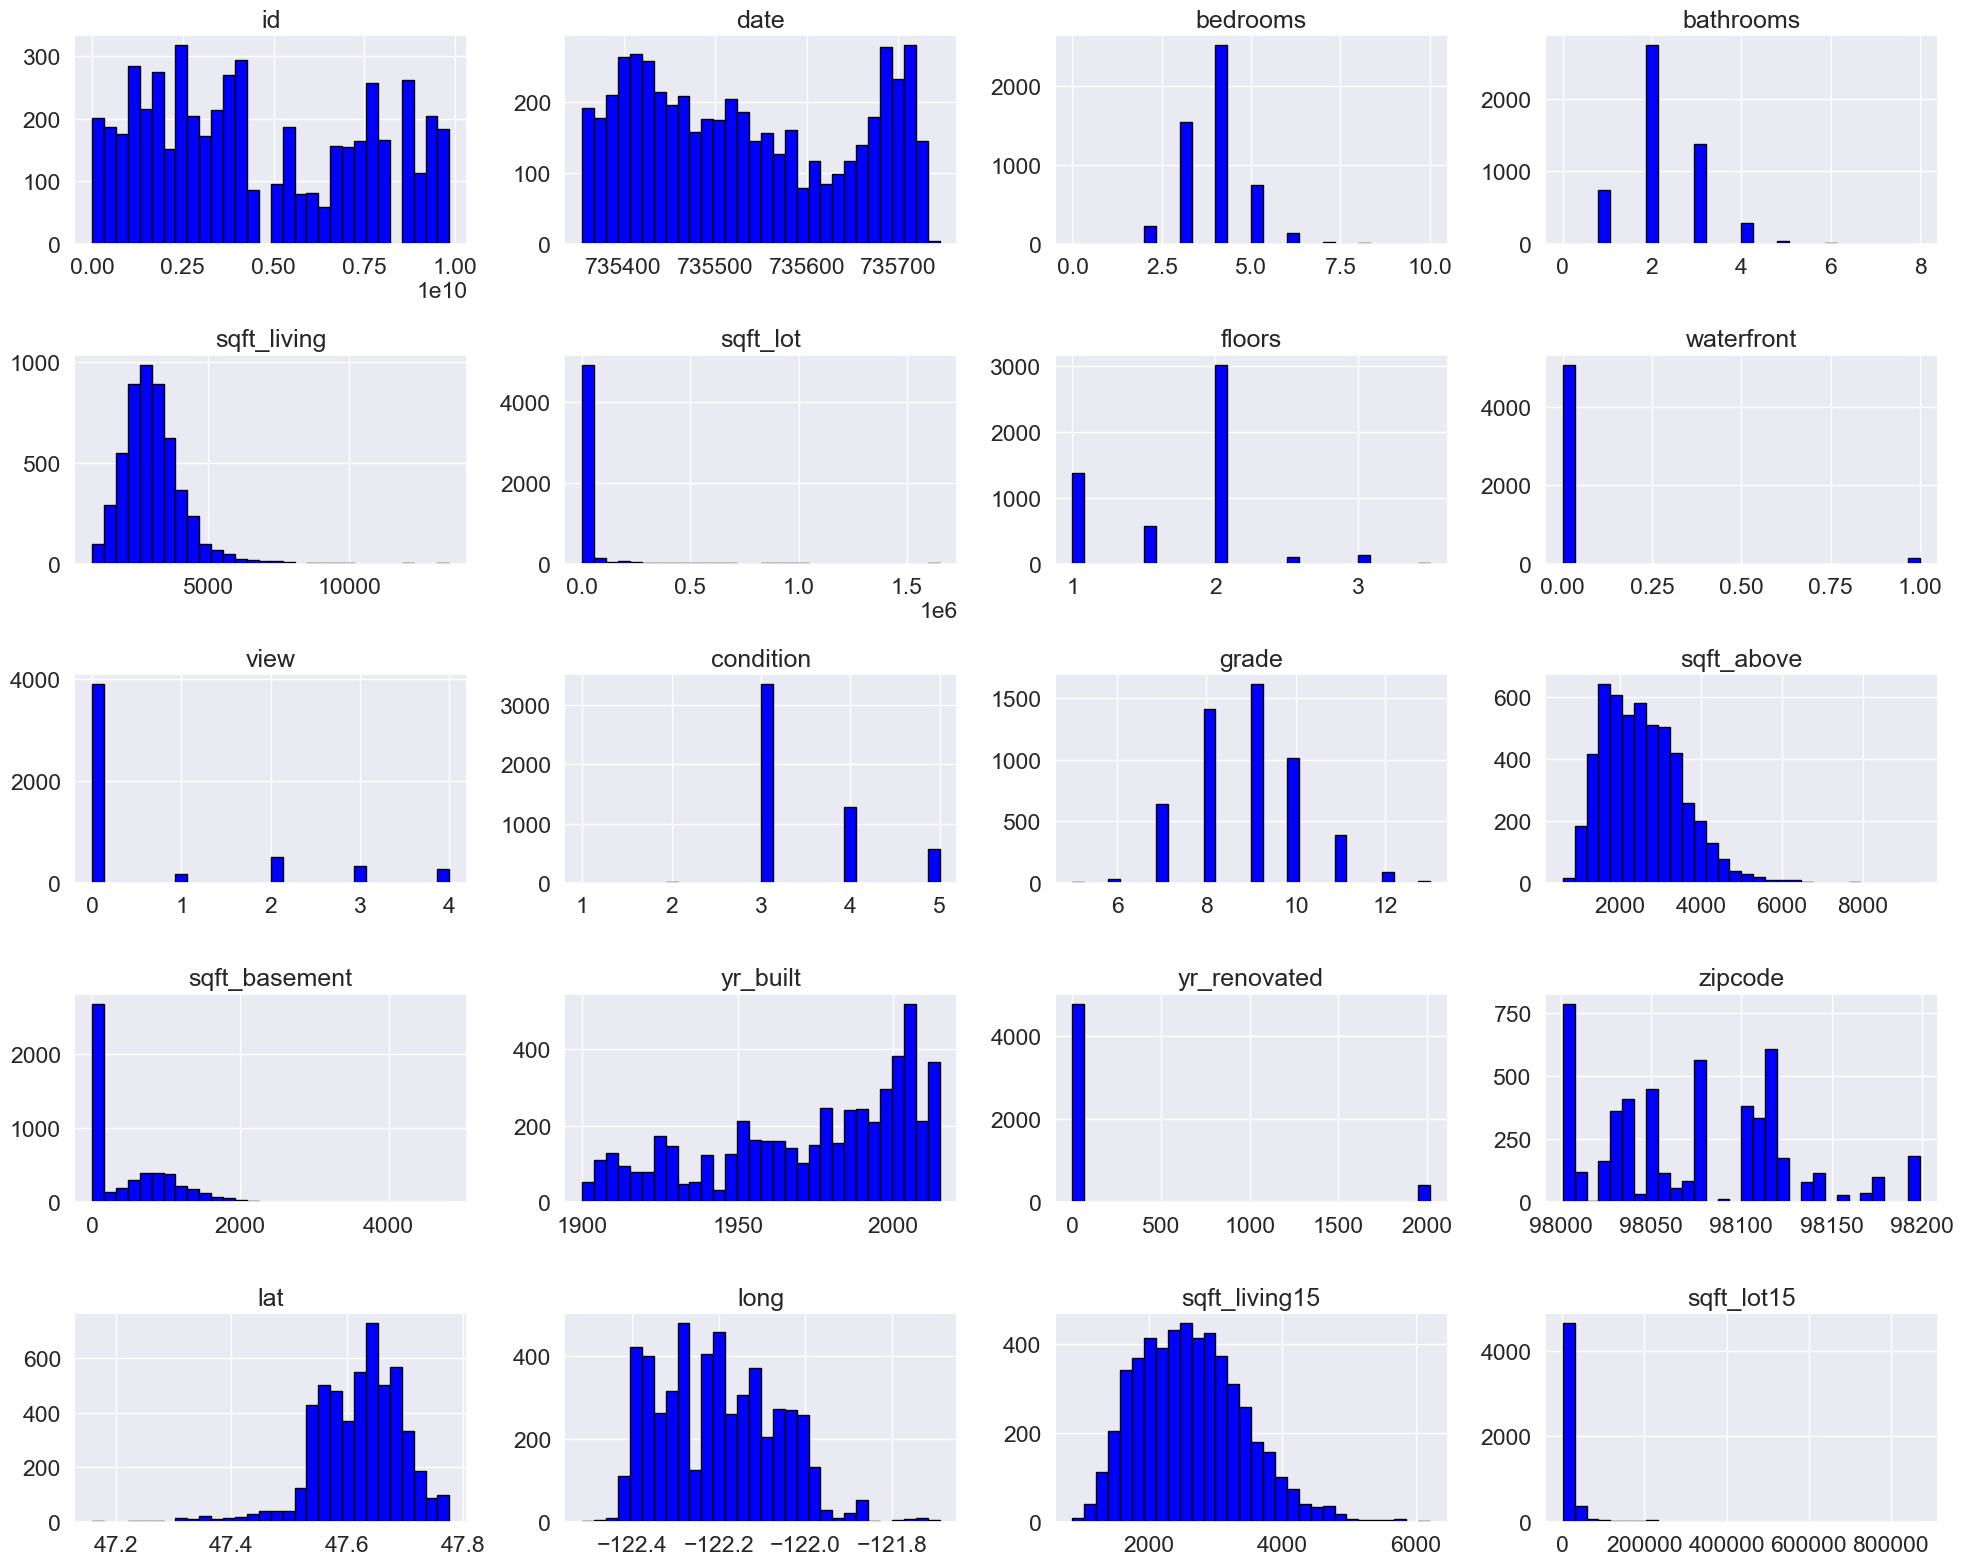

In [160]:
color = '#0000FF'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(casas_filtered.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(casas_filtered.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(casas_filtered.columns[i])

plt.tight_layout()
plt.show()

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled, y_train)

predictions_xgb_2 = xgbr.predict(X_test_scaled)

In [88]:
scaler = MinMaxScaler()

In [89]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [91]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled, y_train)

predictions_xgb_2 = xgbr.predict(X_test_scaled)

In [92]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.8277
RMSE =  194768.529
The value of the metric MSE is  37934779877.9417
MAE =  119850.692


In [94]:
series_pred = pd.Series(predictions_xgb_2, name='predictions')

In [95]:
series_y_test = pd.Series(y_test, name='actual')

In [96]:
comparison_df = pd.concat([series_y_test.reset_index(drop=True), series_pred], axis=1)

In [97]:
comparison_df.head(20)

,actual,predictions
0,719950.0,7.913524e+05
1,960000.0,8.312585e+05
2,875000.0,7.980062e+05
3,731500.0,7.245621e+05
4,657000.0,6.295843e+05
5,760000.0,7.326701e+05
6,705000.0,7.401028e+05
7,865000.0,9.139834e+05
8,988830.0,9.634178e+05
9,1206500.0,1.425266e+06


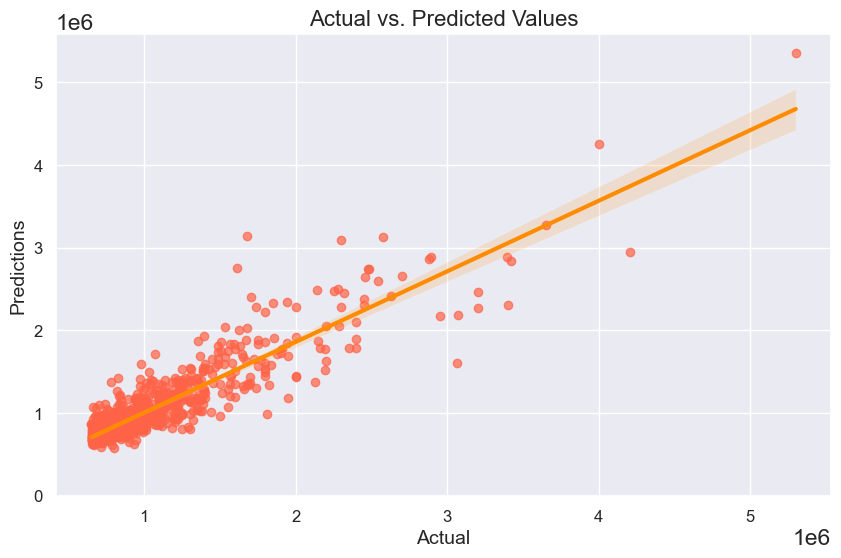

In [98]:
scatter_color = "#FF6347"
line_color = "#FF8C00"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='predictions', data=comparison_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

NORMALIZAMOS ELIGUIENDO LAS COLUMNAS QUE TIENEN UNA DISTRIBUCIÓN MAS PARECIDA A LA NORMAL

In [99]:
# Lista de columnas a escalar
columns_to_scale = ['id', 'date', 'sqft_living', 'sqft_above', 'lat', 'long', 'sqft_living15', 'grade', 'bedrooms', 'bathrooms']

# Inicializa el escalador
scaler = MinMaxScaler()

# Escala solo las columnas seleccionadas en X_train y X_test
X_train_scaled1 = X_train.copy()  # crea una copia para evitar modificar el conjunto de entrenamiento original
X_test_scaled1 = X_test.copy()    # crea una copia para evitar modificar el conjunto de prueba original

X_train_scaled1[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled1[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# Luego procede con tu modelo XGBRegressor
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled, y_train)

predictions_xgb_3 = xgbr.predict(X_test_scaled1)


In [100]:
r2_3_7 = r2_score(y_test, predictions_xgb_3)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_3, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_3)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_3)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.5169
RMSE =  326124.9762
The value of the metric MSE is  106357500085.0149
MAE =  245909.4602


##  9.2 Normalizamos con StandardScaler

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
X1 = casas_filtered.drop("price", axis=1)
y1 = casas_filtered["price"]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [104]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
xgbr.fit(X_train_scaled, y_train)
predictions_xgb_2 = xgbr.predict(X_test_scaled)

In [106]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.8246
RMSE =  196509.5489
The value of the metric MSE is  38616002823.8217
MAE =  121159.9753


## 9.3 Normalizamos con Log Transform

In [107]:
X_train_log = np.log1p(X_train) 
X_test_log = np.log1p(X_test)

C:\Users\Carlos\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [108]:
xgbr.fit(X_train_log, y_train)
predictions_xgb_2 = xgbr.predict(X_test_log)

In [109]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.754
RMSE =  232733.2054
The value of the metric MSE is  54164744893.9592
MAE =  131581.8473


##  10. Mejora del modelo con limpieza de multicolinealidad
-  Nos quedamos con la normalización con MinMaxScaler que nos da el mejor resultado

In [110]:
num_corr = round(casas_filtered.corr(), 2)

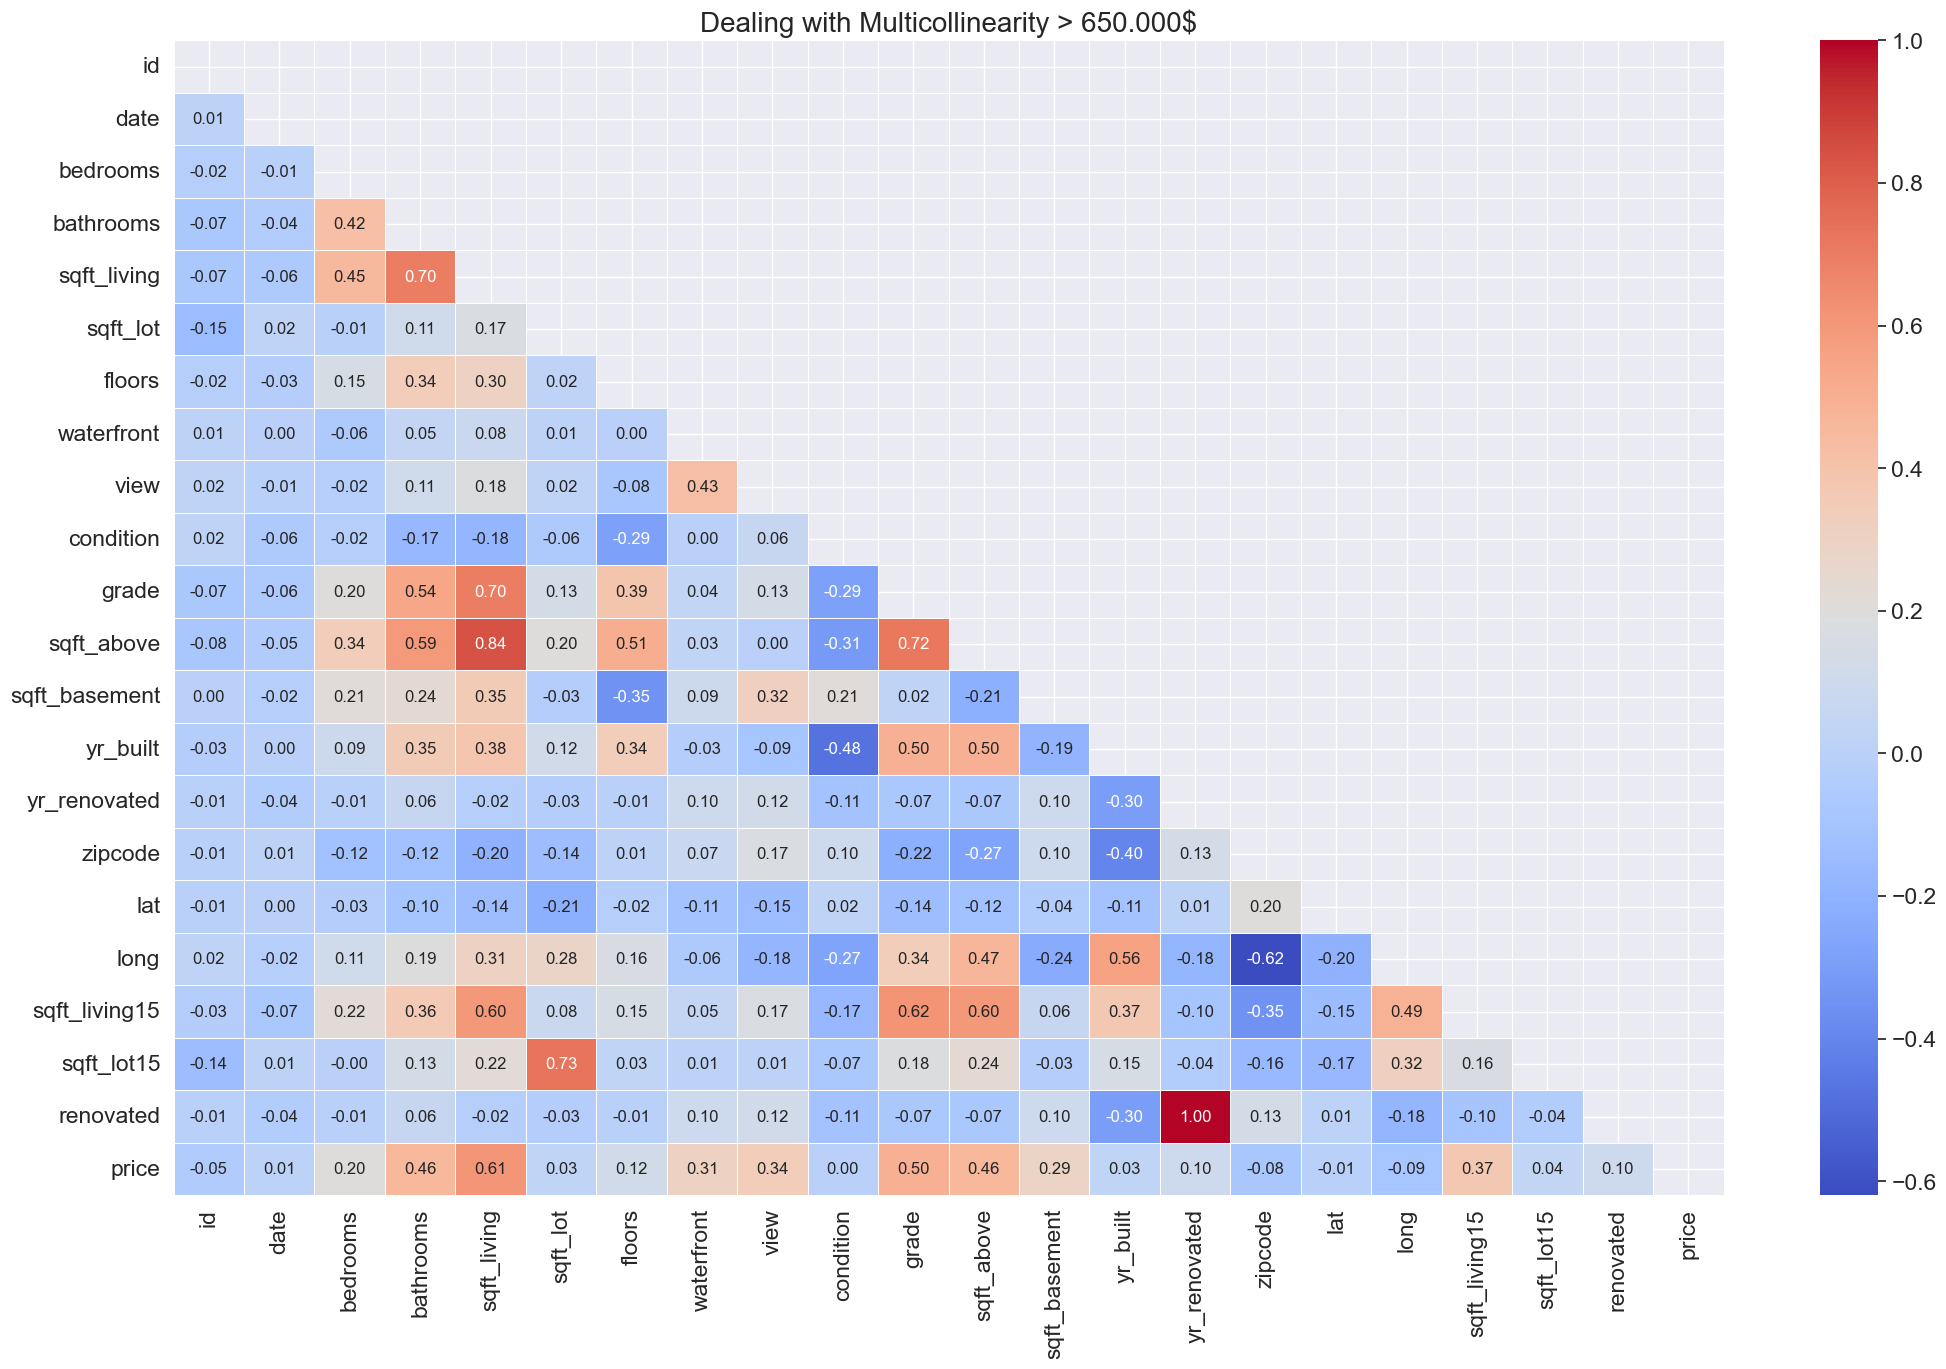

In [111]:
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity > 650.000$", fontsize=20) # add title
plt.show()

In [112]:
casas_filtered.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'renovated', 'price'],
      dtype='object')

In [114]:
X2 = casas_filtered.drop("price", axis=1)
y2 = casas_filtered["price"]

In [115]:
X_new = X2.drop(['id','date','yr_built','renovated', 'bedrooms','sqft_lot','floors','condition', 'bathrooms', 'sqft_living'], axis=1)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y2, test_size=0.2, random_state=42)

In [117]:
X_train_scaled1 = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [118]:
X_new.shape

(5207, 11)

In [119]:
X_train_scaled1.shape

(4165, 11)

In [120]:
X_test_scaled.shape

(1042, 11)

In [121]:
y_train.shape

(4165,)

In [122]:
y_test.shape

(1042,)

In [123]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled1, y_train)

predictions_xgb_2 = xgbr.predict(X_test_scaled)

In [124]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.8236
RMSE =  197101.2988
The value of the metric MSE is  38848921998.9918
MAE =  122905.0127


In [125]:
series_pred = pd.Series(predictions_xgb_2, name='predictions')

In [126]:
series_y_test = pd.Series(y_test, name='actual')

In [127]:
comparison_df = pd.concat([series_y_test.reset_index(drop=True), series_pred], axis=1)

In [128]:
comparison_df.head(20)

,actual,predictions
0,719950.0,7.739487e+05
1,960000.0,8.246128e+05
2,875000.0,8.404671e+05
3,731500.0,6.911729e+05
4,657000.0,6.133753e+05
5,760000.0,7.087762e+05
6,705000.0,8.017148e+05
7,865000.0,7.615061e+05
8,988830.0,9.644526e+05
9,1206500.0,1.303908e+06


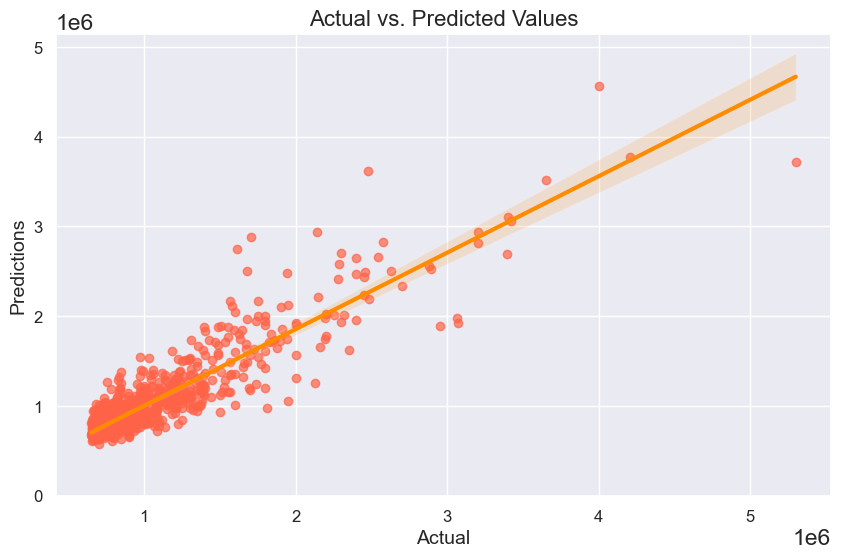

In [129]:
scatter_color = "#FF6347"
line_color = "#FF8C00"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='predictions', data=comparison_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##  11. ELIMINAMOS OUTLIERS DE LA COLUMNA PRICE

In [130]:
import numpy as np

# Calcula los cuartiles y los límites para la columna 'price'
Q1 = casas_filtered['price'].quantile(0.25)
Q3 = casas_filtered['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtra el DataFrame original para mantener solo las filas sin outliers en 'price'
casas_filtered1 = casas_filtered[(casas_filtered['price'] >= lower_bound) & (casas_filtered['price'] <= upper_bound)]


In [131]:
columns_to_drop = ['id','date','yr_built','renovated', 'bedrooms','sqft_lot','floors','condition', 'bathrooms', 'sqft_living']

X3 = casas_filtered1.drop(columns_to_drop, axis=1)
y3 = casas_filtered1["price"]

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [133]:
X_train_scaled_outliers = scaler.fit_transform(X_train)
X_test_scaled_outliers = scaler.transform(X_test)

In [134]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled_outliers, y_train)

predictions_xgb_2 = xgbr.predict(X_test_scaled_outliers)

In [135]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.9999
RMSE =  2223.3292
The value of the metric MSE is  4943192.8282
MAE =  1282.8354


In [136]:
series_pred = pd.Series(predictions_xgb_2, name='predictions')

In [137]:
series_y_test = pd.Series(y_test, name='actual')

In [138]:
comparison_df = pd.concat([series_y_test.reset_index(drop=True), series_pred], axis=1)

In [139]:
comparison_df.head(20)

,actual,predictions
0,1100000.0,1.104026e+06
1,781000.0,7.801783e+05
2,795000.0,7.959756e+05
3,762300.0,7.622088e+05
4,739999.0,7.403202e+05
5,1400000.0,1.399770e+06
6,855000.0,8.564809e+05
7,829950.0,8.287938e+05
8,850000.0,8.503183e+05
9,675000.0,6.750177e+05


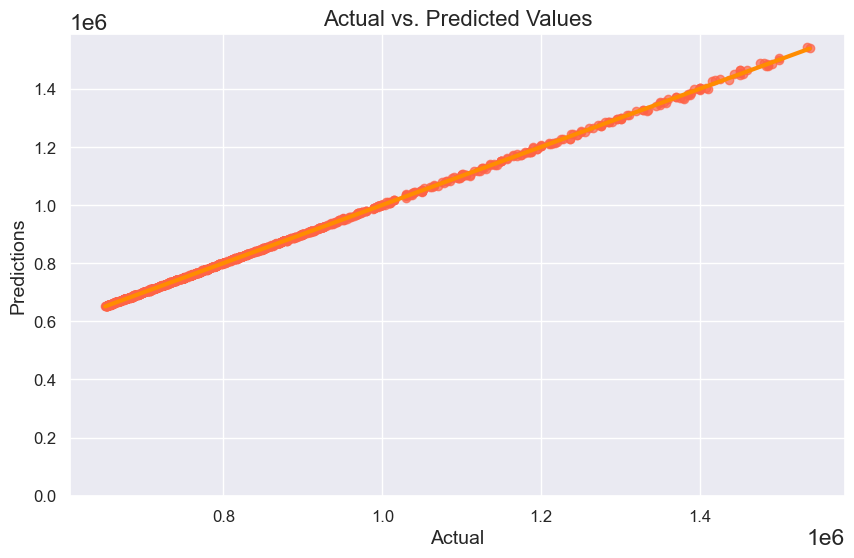

In [140]:
scatter_color = "#FF6347"
line_color = "#FF8C00"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='predictions', data=comparison_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## 11.2 Probamos eliminar todos los outliers

In [141]:
def outlier_slayer(casas_filtered): 
    for column in casas_filtered.select_dtypes(include=[np.number]):
        Q1 = casas_filtered[column].quantile(0.25)
        Q3 = casas_filtered[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        casas_filtered = casas_filtered[(casas_filtered[column] >= lower_bound) & (casas_filtered[column] <= upper_bound)]
    return casas_filtered

In [142]:
casas_filtered2 = outlier_slayer(casas_filtered)

In [143]:
casas_filtered2.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'renovated', 'price'],
      dtype='object')

In [144]:
casas_filtered2.shape

(2488, 22)

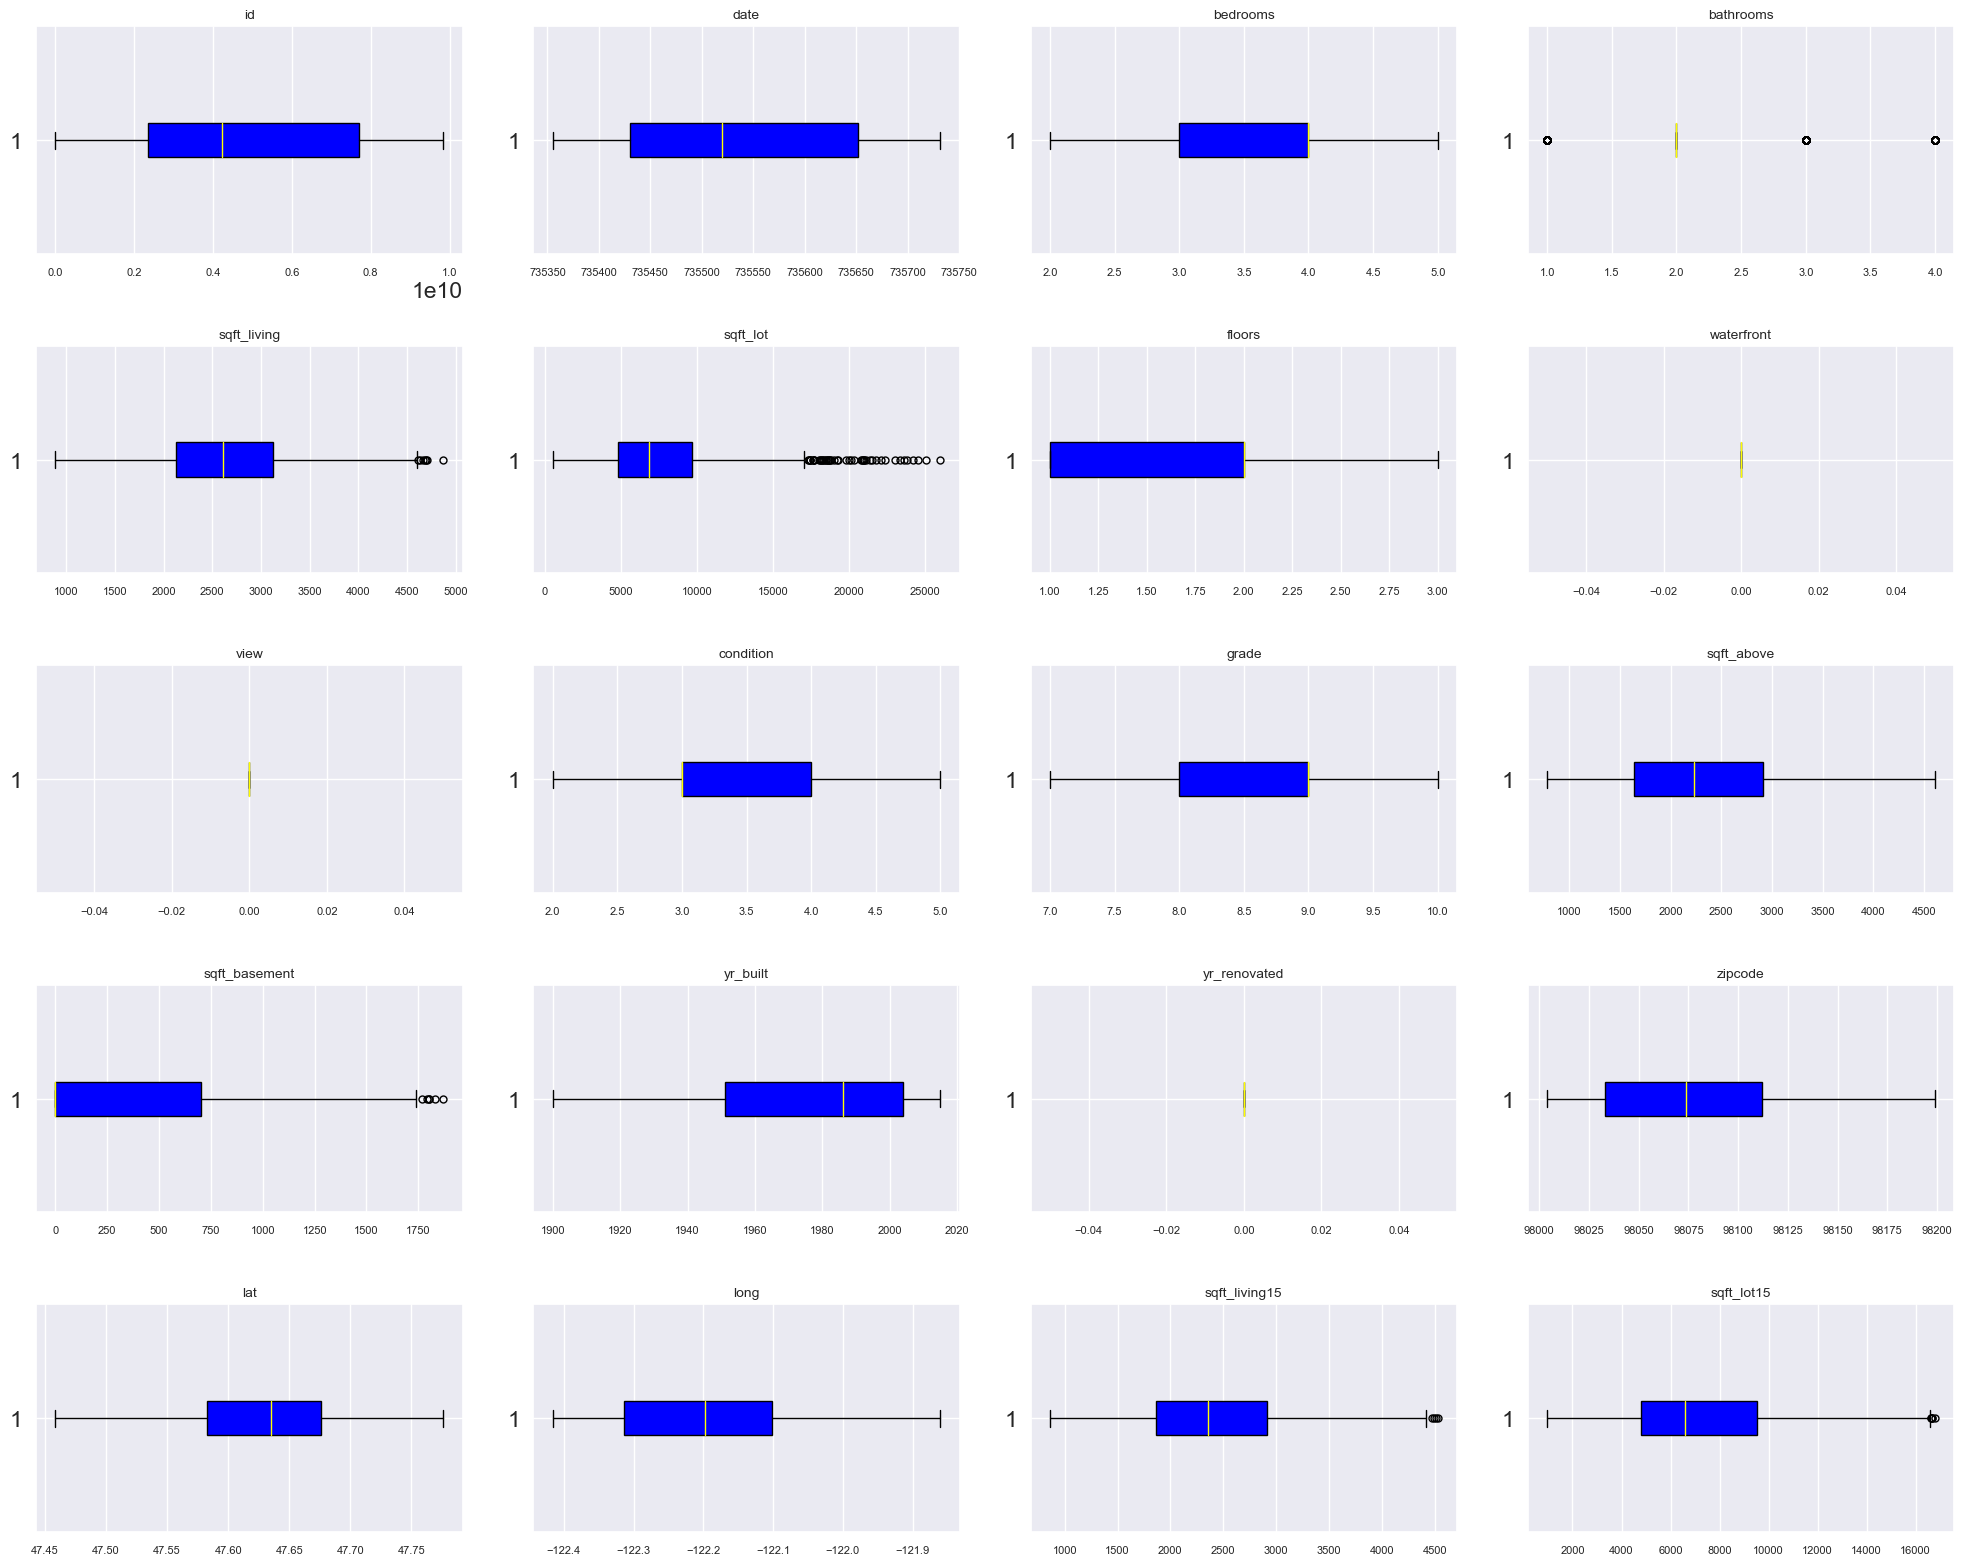

In [161]:
color = '#0000FF'
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(casas_filtered2.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(casas_filtered2.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(casas_filtered2.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

In [146]:
# Lista de columnas a eliminar
columns_to_drop = ['id','date','yr_built','renovated', 'bedrooms','sqft_lot','floors','condition', 'bathrooms', 'sqft_living']

X4 = casas_filtered1.drop(columns_to_drop, axis=1)
y4 = casas_filtered1["price"]


In [147]:
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

In [148]:
X_train_scaled_outliers = scaler.fit_transform(X_train)
X_test_scaled_outliers = scaler.transform(X_test)

In [149]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled_outliers, y_train)

predictions_xgb_2 = xgbr.predict(X_test_scaled_outliers)

In [150]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.9999
RMSE =  2223.3292
The value of the metric MSE is  4943192.8282
MAE =  1282.8354


In [151]:
series_pred = pd.Series(predictions_xgb_2, name='predictions')

In [152]:
series_y_test = pd.Series(y_test, name='actual')

In [153]:
comparison_df = pd.concat([series_y_test.reset_index(drop=True), series_pred], axis=1)

In [154]:
comparison_df.head(20)

,actual,predictions
0,1100000.0,1.104026e+06
1,781000.0,7.801783e+05
2,795000.0,7.959756e+05
3,762300.0,7.622088e+05
4,739999.0,7.403202e+05
5,1400000.0,1.399770e+06
6,855000.0,8.564809e+05
7,829950.0,8.287938e+05
8,850000.0,8.503183e+05
9,675000.0,6.750177e+05


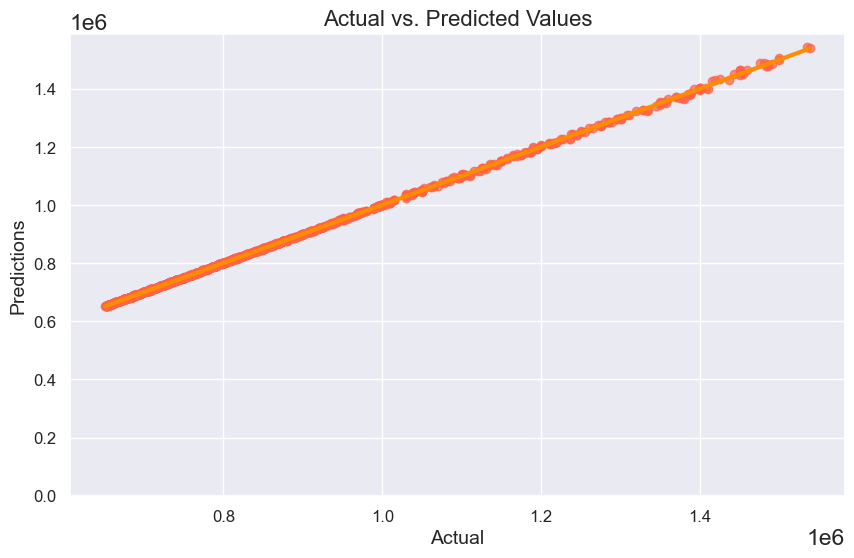

In [155]:
scatter_color = "#FF6347"
line_color = "#FF8C00"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='predictions', data=comparison_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()